In [1]:
import pandas as pd

In [2]:
original_data=pd.read_csv("/kaggle/input/shaped-data/labeled_data.csv")

Basic Statistics:
         Unnamed: 0          open         close          high           low  \
count  21586.000000  21586.000000  21586.000000  21586.000000  21586.000000   
mean      35.479663    471.394300    471.431257    474.594558    468.230999   
min        0.000000    120.435065    119.693936    122.900748    119.107243   
25%       17.000000    326.243494    326.235929    328.436753    324.179634   
50%       35.000000    421.123272    421.123272    423.839991    418.624755   
75%       53.000000    562.764858    562.810340    566.221520    559.196819   
max       71.000000   1700.266366   1700.266366   1712.894269   1690.460554   
std       20.774304    212.428496    212.561269    213.897690    211.091586   

                                date  
count                          21586  
mean   2020-07-30 04:21:30.169554176  
min              2020-01-02 09:00:00  
25%              2020-04-15 14:41:15  
50%              2020-07-29 14:22:30  
75%              2020-11-12 09:13:45

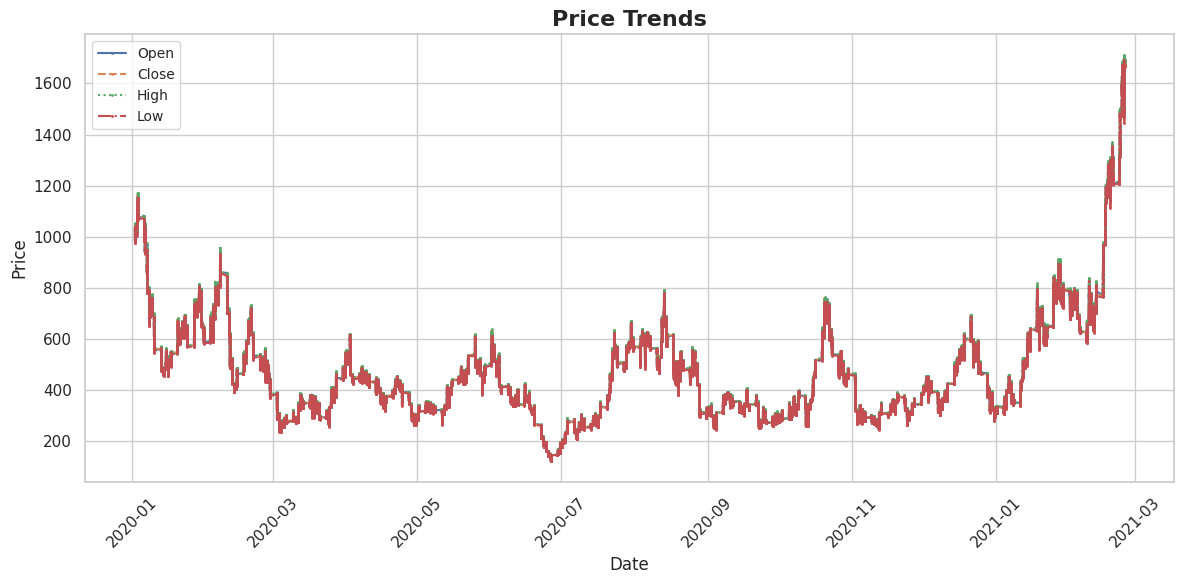

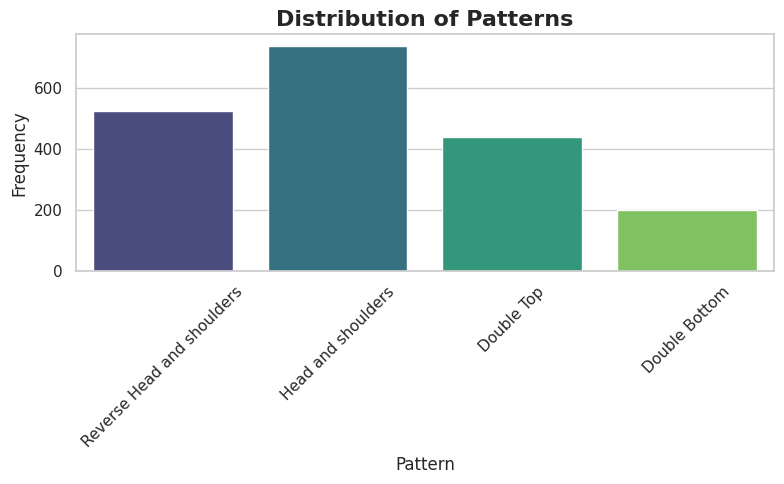

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
df = original_data
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')

# Basic statistics
print("Basic Statistics:")
print(df.describe())
print()

# Set seaborn style
sns.set(style="whitegrid")

# Line plot for open, close, high, and low prices
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['open'], label='Open', marker='o', markersize=1, linestyle='-')
plt.plot(df['date'], df['close'], label='Close', marker='o', markersize=1, linestyle='--')
plt.plot(df['date'], df['high'], label='High', marker='o', markersize=1, linestyle=':')
plt.plot(df['date'], df['low'], label='Low', marker='o', markersize=1, linestyle='-.')
plt.title('Price Trends', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribution of patterns
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='pattern', palette='viridis')
plt.title('Distribution of Patterns', fontsize=16, fontweight='bold')
plt.xlabel('Pattern', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

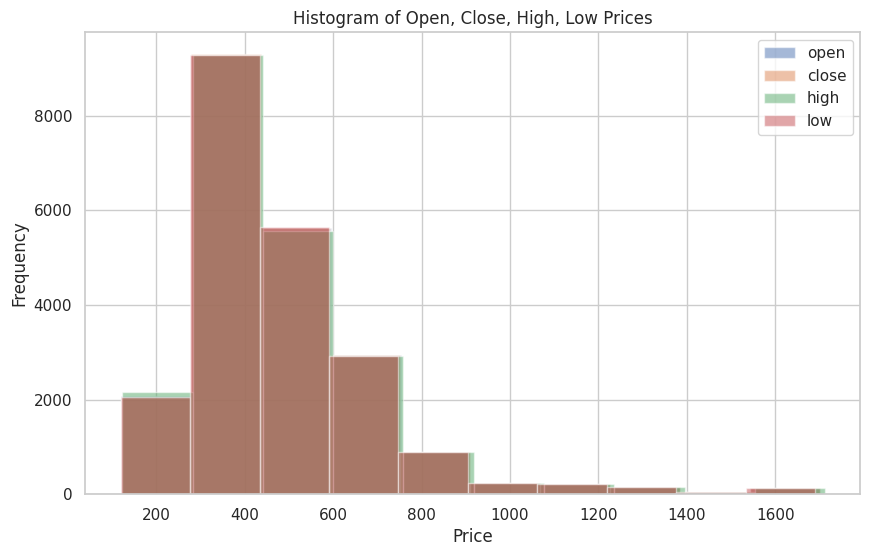

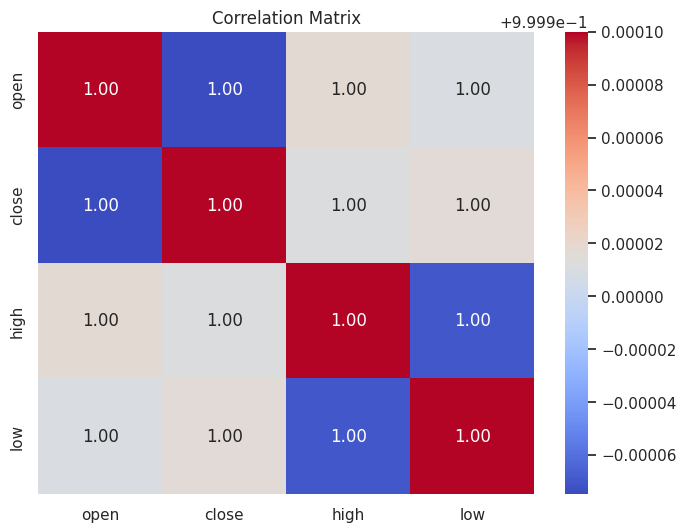

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/kaggle/input/shaped-data/labeled_data.csv")

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')

# Plot histograms for open, close, high, low
plt.figure(figsize=(10, 6))
for column in ['open', 'close', 'high', 'low']:
    plt.hist(df[column], bins=10, alpha=0.5, label=column)
plt.title('Histogram of Open, Close, High, Low Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df[['open', 'close', 'high', 'low']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


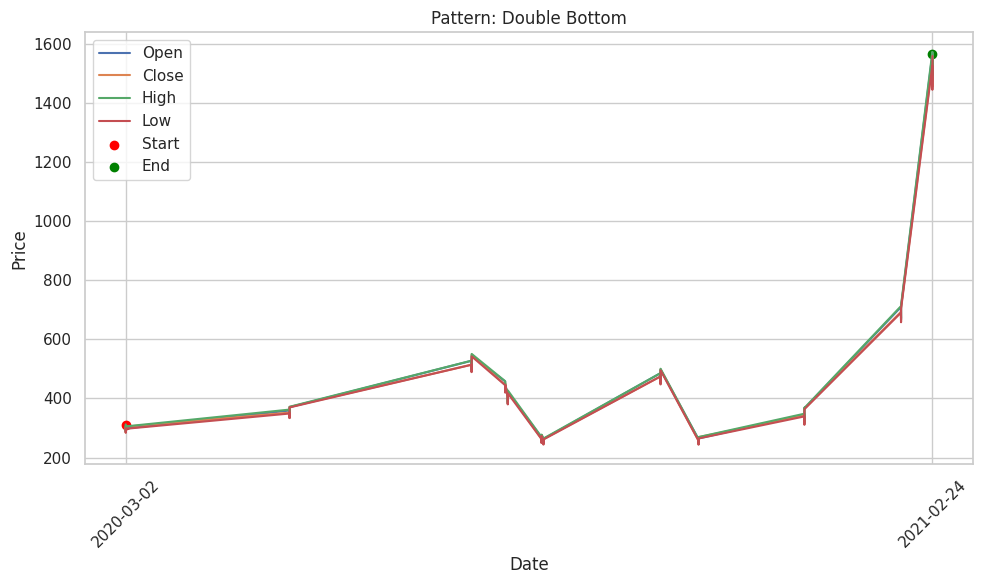

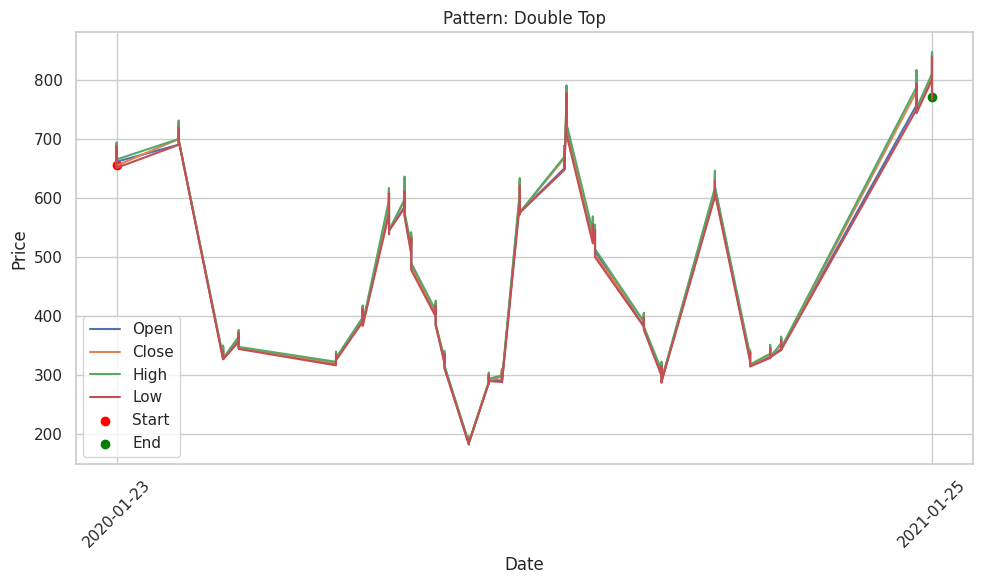

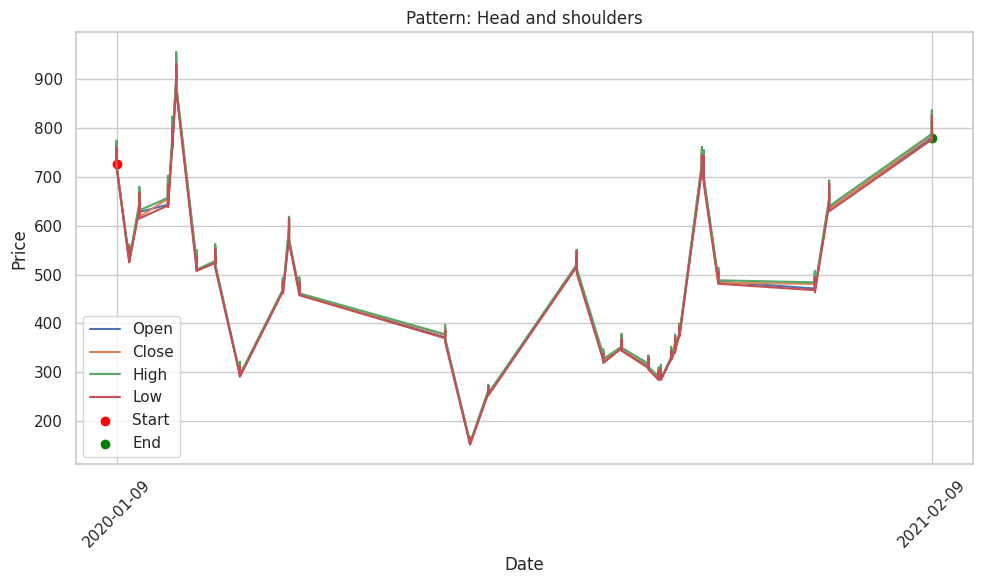

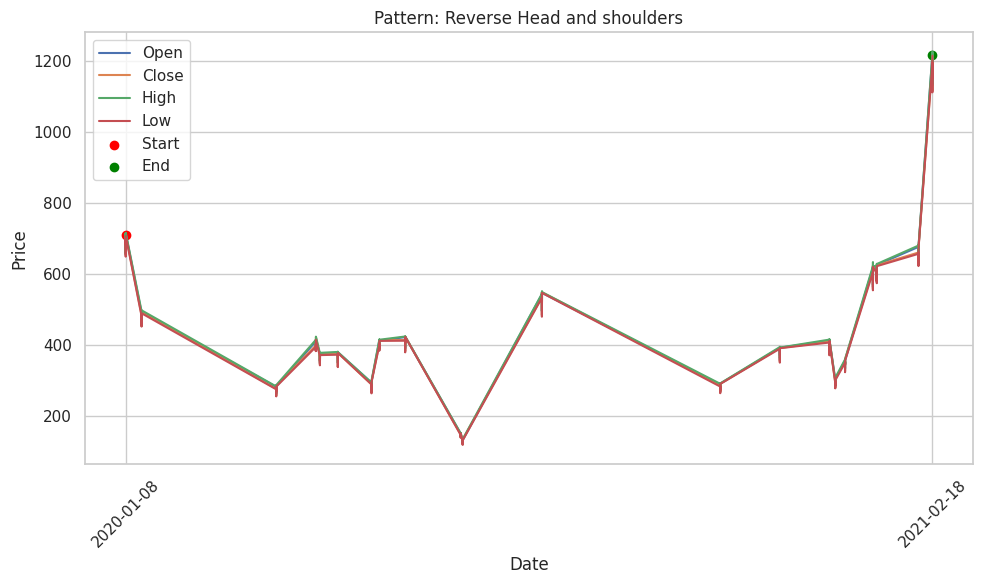

In [5]:
import matplotlib.pyplot as plt

def plot_pattern(pattern_label, pattern_data):
    plt.figure(figsize=(10, 6))
    plt.plot(pattern_data['date'], pattern_data['open'], label='Open')
    plt.plot(pattern_data['date'], pattern_data['close'], label='Close')
    plt.plot(pattern_data['date'], pattern_data['high'], label='High')
    plt.plot(pattern_data['date'], pattern_data['low'], label='Low')
    
    plt.scatter(pattern_data.iloc[0]['date'], pattern_data.iloc[0]['open'], color='red', marker='o', label='Start')
    plt.scatter(pattern_data.iloc[-1]['date'], pattern_data.iloc[-1]['open'], color='green', marker='o', label='End')
    
    plt.title(f'Pattern: {pattern_label}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    
    # Set x-axis ticks to start and end dates
    plt.xticks([pattern_data.iloc[0]['date'], pattern_data.iloc[-1]['date']], rotation=45)
    
    plt.tight_layout()
    plt.show()

filtered_data = original_data.dropna(subset=['pattern'])

for pattern_label, pattern_data in filtered_data.groupby('pattern'):
    plot_pattern(pattern_label, pattern_data)

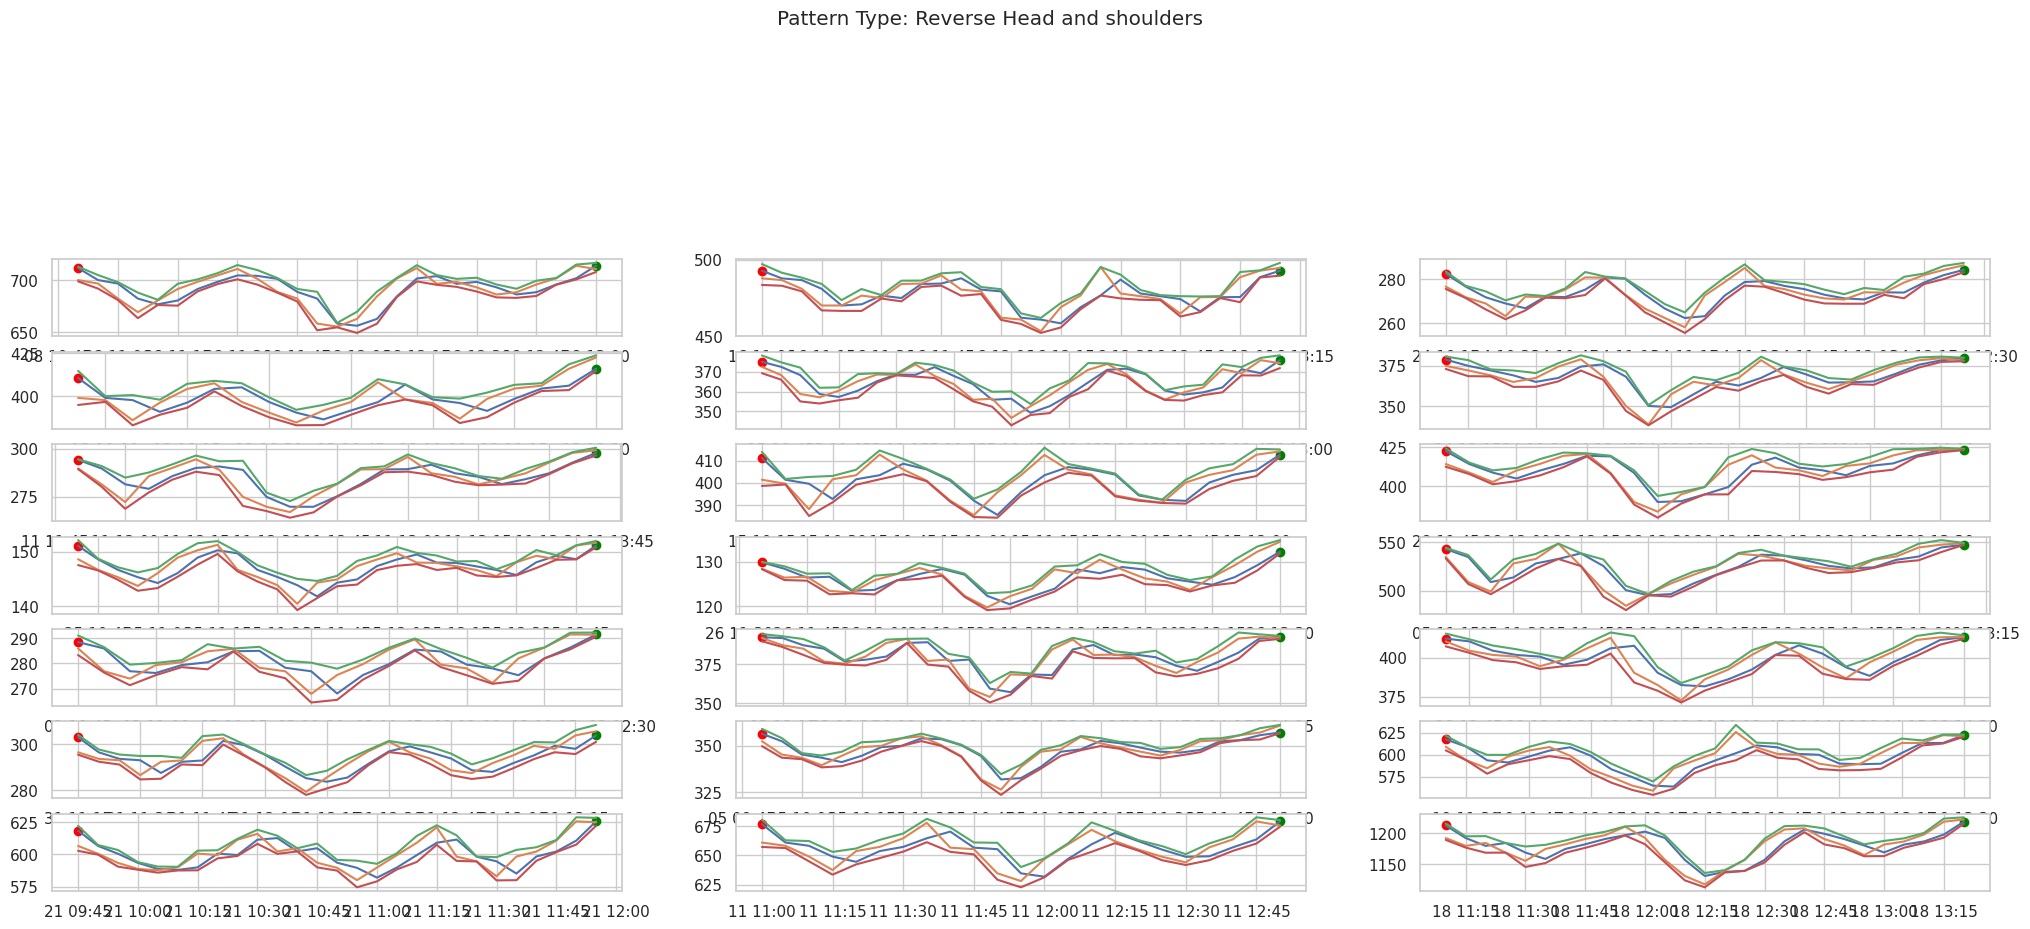

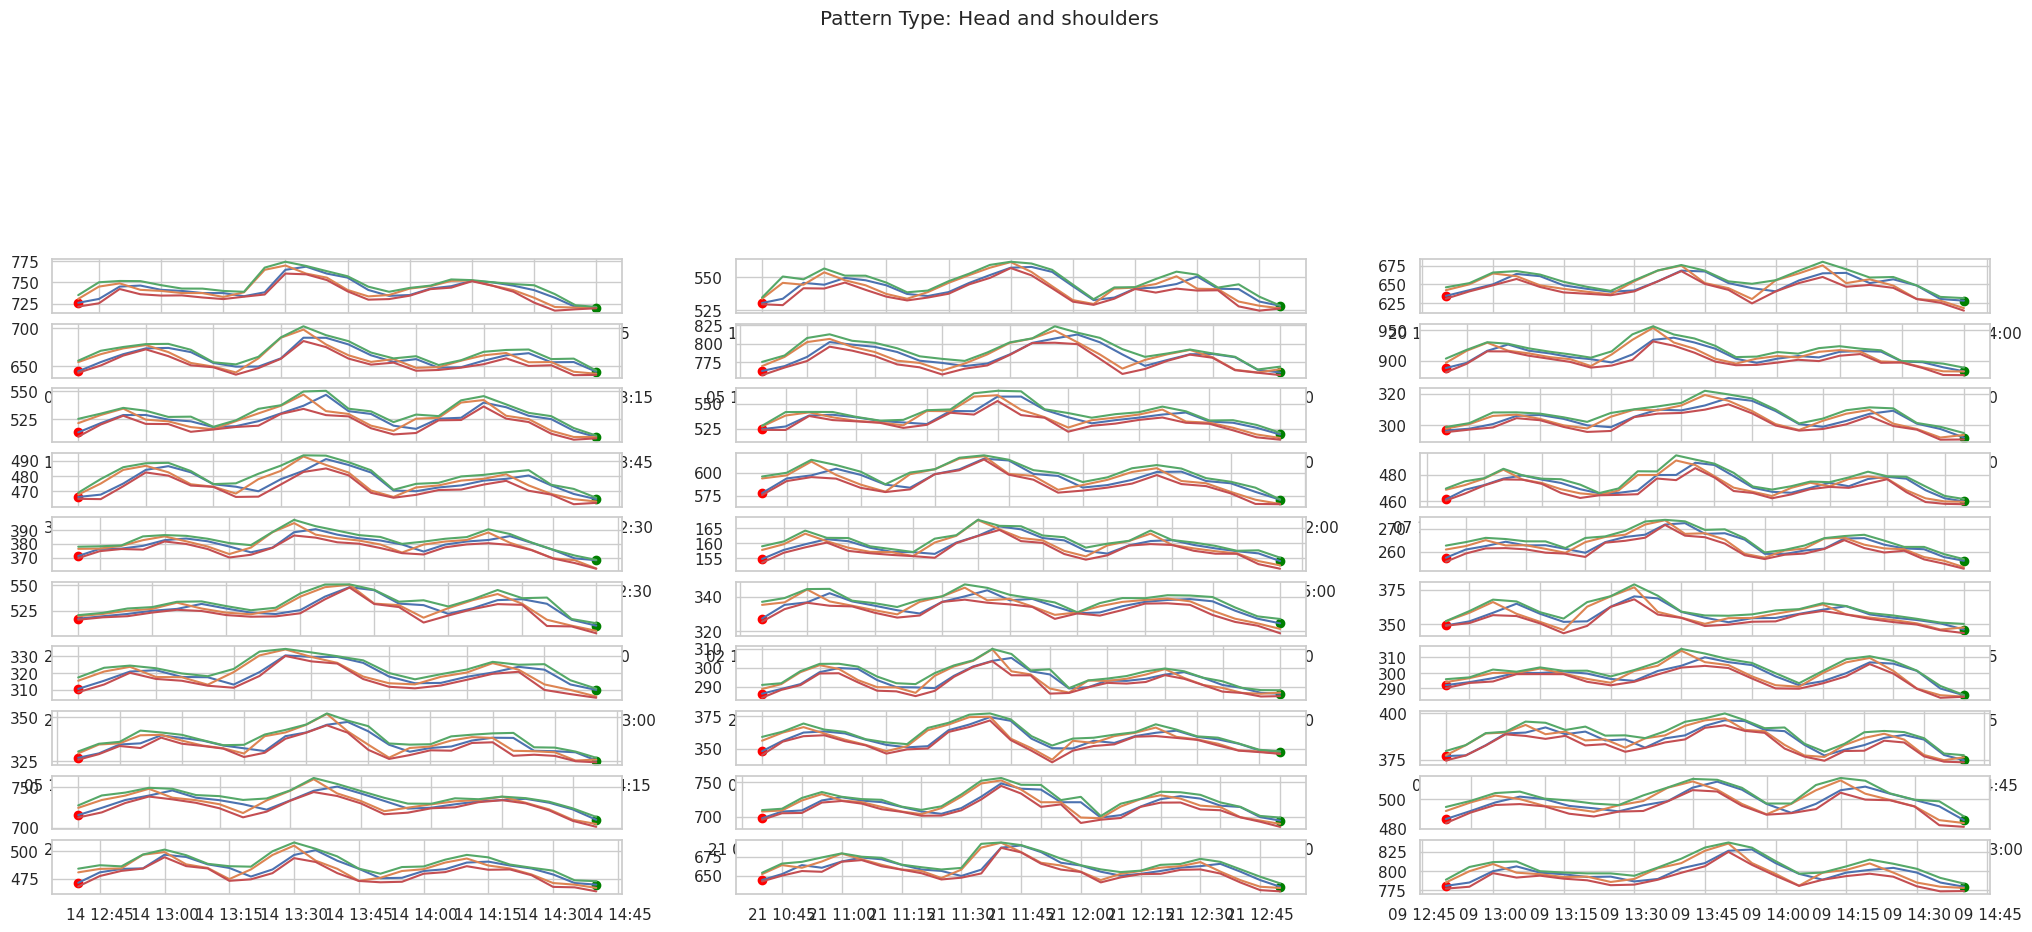

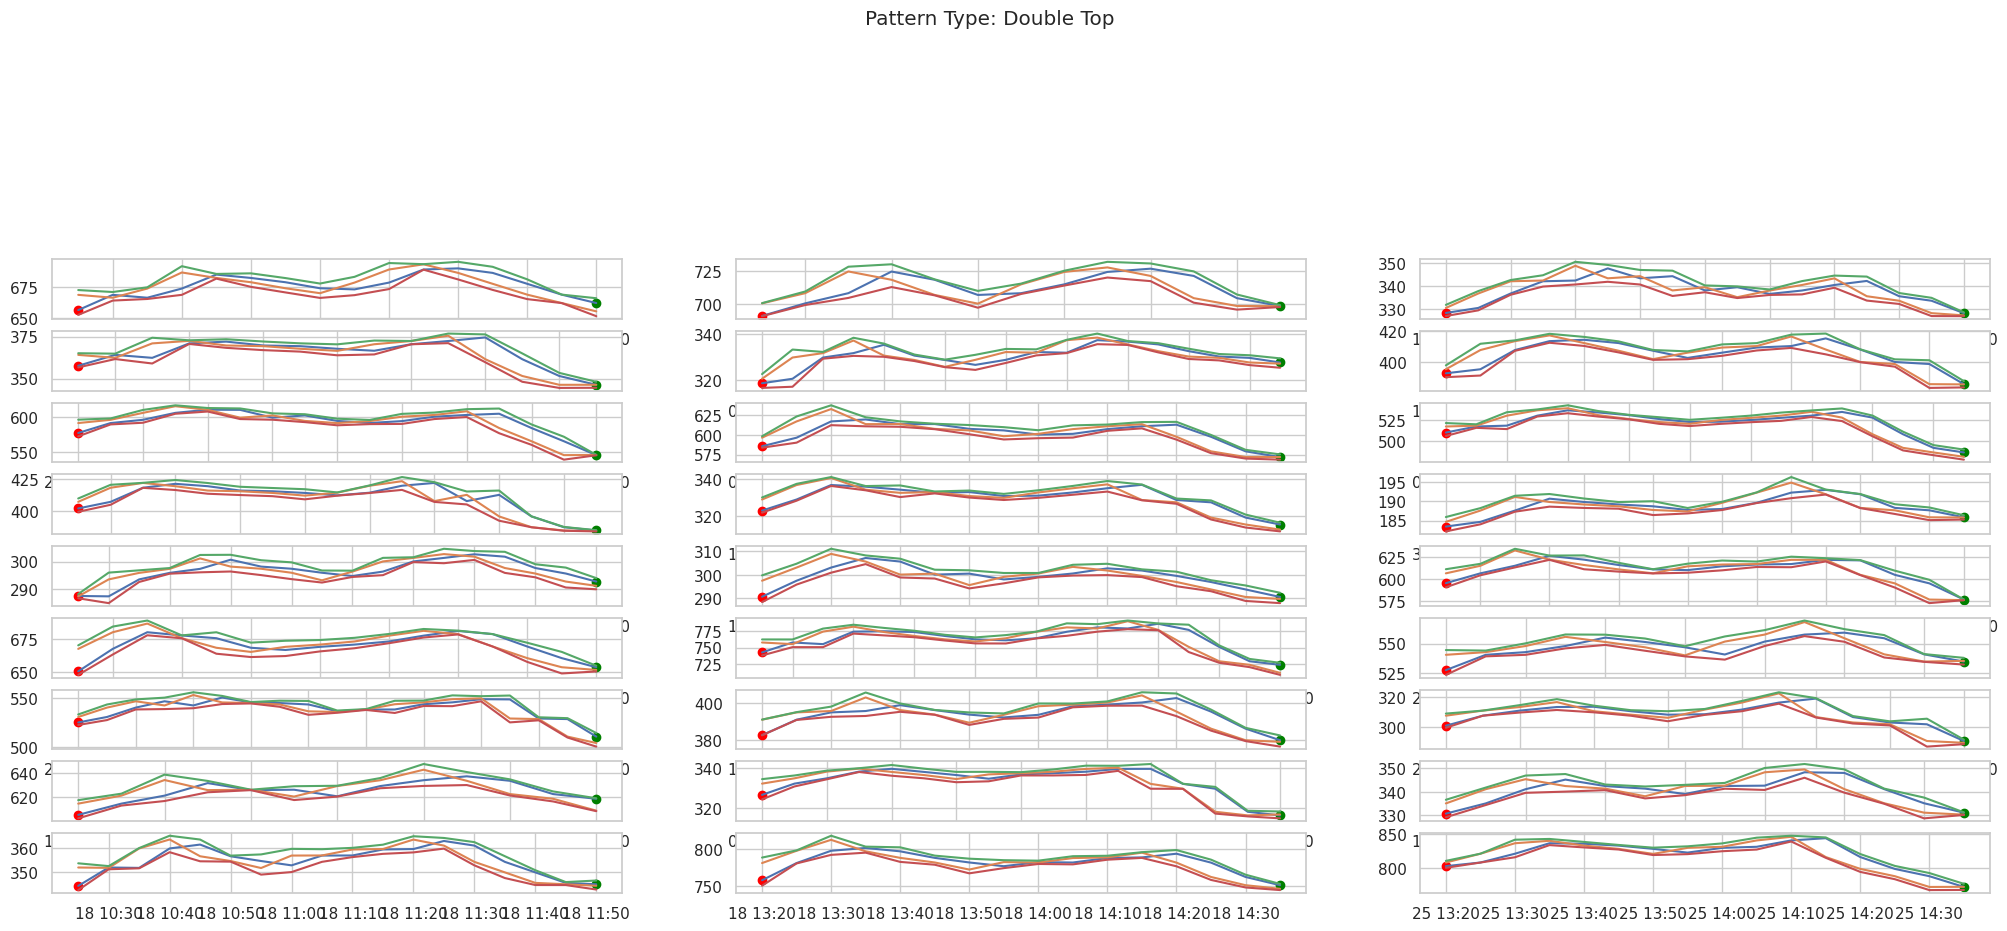

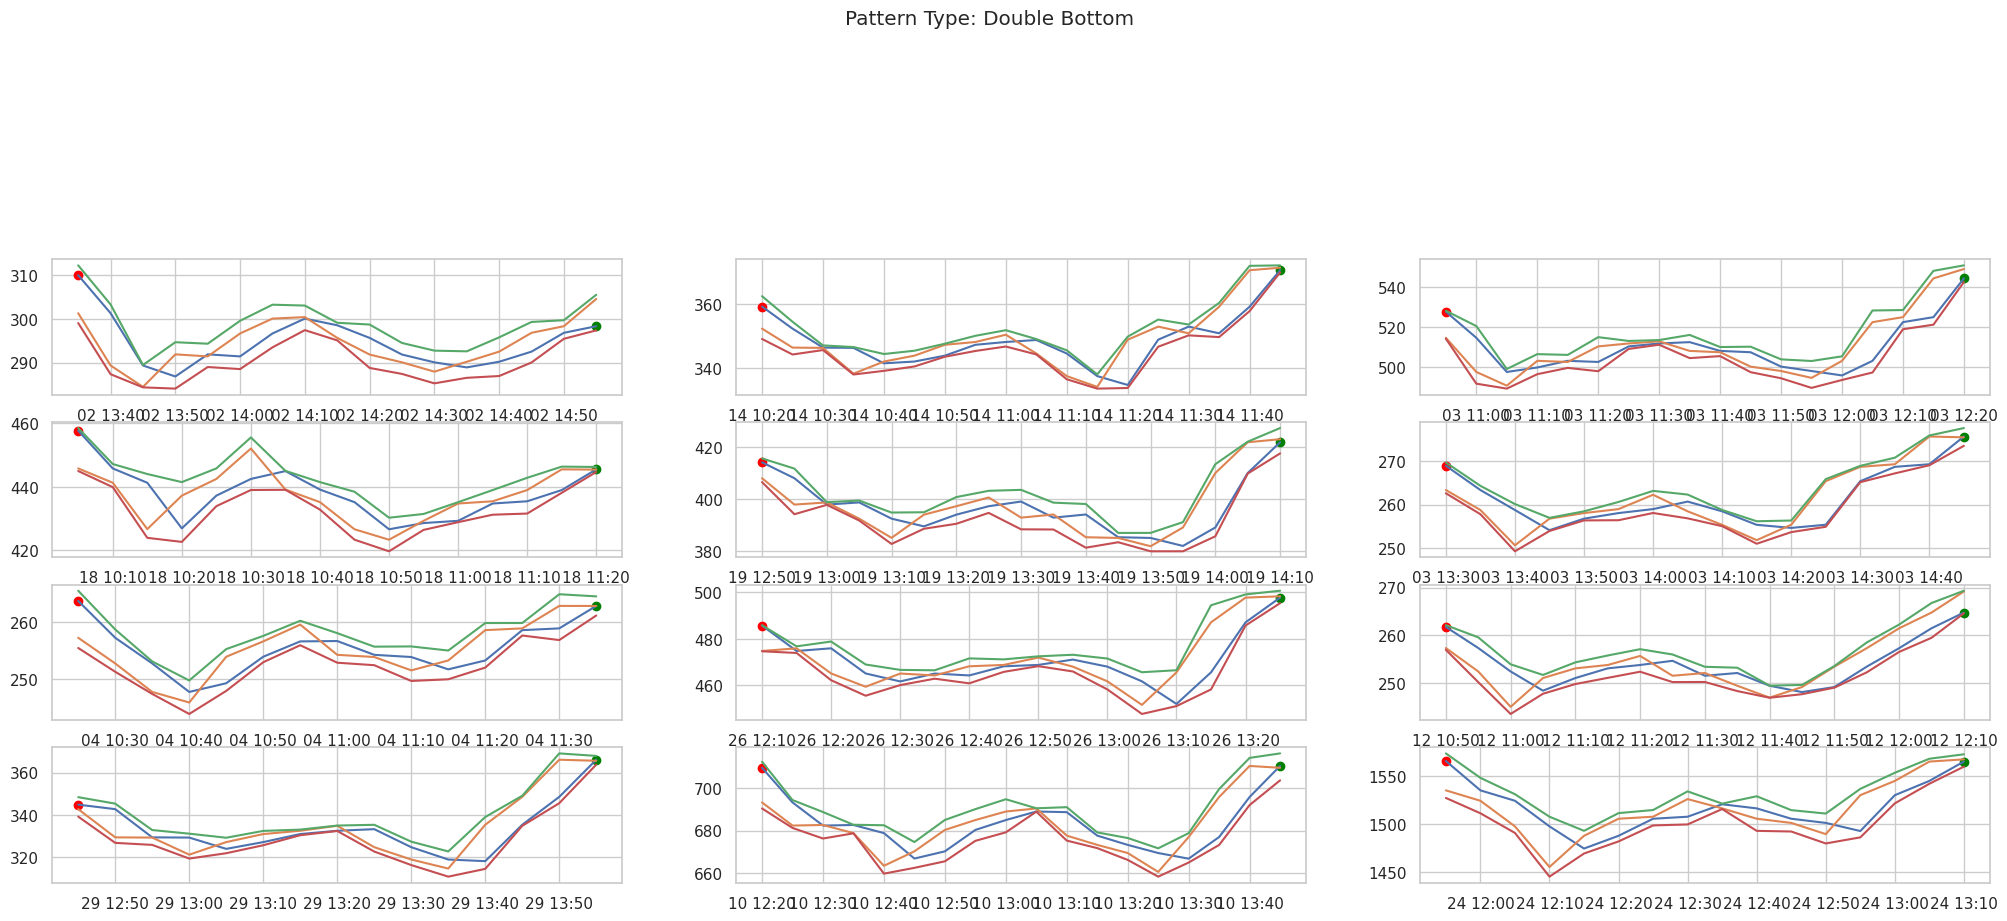

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

original_data = pd.read_csv("/kaggle/input/charts-patterns/SampleData.csv")
ground_truth_df = pd.read_csv("/kaggle/input/charts-patterns/SampleDataGT.csv")

# Convert date columns to datetime objects
ground_truth_df['start'] = pd.to_datetime(ground_truth_df['start'], format='%Y-%m-%d %H:%M:%S')
ground_truth_df['end'] = pd.to_datetime(ground_truth_df['end'], format='%Y-%m-%d %H:%M:%S')
original_data['date'] = pd.to_datetime(original_data['date'], format='%Y-%m-%d %H:%M:%S')

# Get unique pattern types
unique_patterns = ground_truth_df['pattern'].unique()

# Plot graphs for each pattern type
for pattern_type in unique_patterns:
    plt.figure(figsize=(25, 25))
    plt.suptitle(f"Pattern Type: {pattern_type}")
    
    # Get data for the current pattern type
    pattern_data = ground_truth_df[ground_truth_df['pattern'] == pattern_type]

    for i, (_, row) in enumerate(pattern_data.iterrows(), 1):
        # Get data for each pattern instance
        instance_data = original_data[(original_data['date'] >= row['start']) & (original_data['date'] <= row['end'])]

        plt.subplot(len(pattern_data), 3, i)
        plt.plot(instance_data['date'], instance_data['open'], label='Open')
        plt.plot(instance_data['date'], instance_data['close'], label='Close')
        plt.plot(instance_data['date'], instance_data['high'], label='High')
        plt.plot(instance_data['date'], instance_data['low'], label='Low')

        plt.scatter(instance_data.iloc[0]['date'], instance_data.iloc[0]['open'], color='red', marker='o', label='Start')
        plt.scatter(instance_data.iloc[-1]['date'], instance_data.iloc[-1]['open'], color='green', marker='o', label='End')

        plt.grid(True)
    plt.show()
